#**Model building (device agnostic)**


##**Dependencies**

In [286]:
import torch
import matplotlib.pyplot as plt
from torch import nn
from pathlib import Path

In [224]:
torch.__version__

'2.9.0+cu126'

In [225]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [226]:
!nvidia-smi

Sun Jan  4 11:05:42 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   77C    P0             30W /   70W |     158MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## **Create Dummy Data**

In [227]:
weight=0.91
bias=1.8

start=0
end=100
step=2

X=torch.arange(start=start,end=end,step=step,dtype=torch.float32).unsqueeze(dim=1)
y=weight*X+bias

In [228]:
X,y

(tensor([[ 0.],
         [ 2.],
         [ 4.],
         [ 6.],
         [ 8.],
         [10.],
         [12.],
         [14.],
         [16.],
         [18.],
         [20.],
         [22.],
         [24.],
         [26.],
         [28.],
         [30.],
         [32.],
         [34.],
         [36.],
         [38.],
         [40.],
         [42.],
         [44.],
         [46.],
         [48.],
         [50.],
         [52.],
         [54.],
         [56.],
         [58.],
         [60.],
         [62.],
         [64.],
         [66.],
         [68.],
         [70.],
         [72.],
         [74.],
         [76.],
         [78.],
         [80.],
         [82.],
         [84.],
         [86.],
         [88.],
         [90.],
         [92.],
         [94.],
         [96.],
         [98.]]),
 tensor([[ 1.8000],
         [ 3.6200],
         [ 5.4400],
         [ 7.2600],
         [ 9.0800],
         [10.9000],
         [12.7200],
         [14.5400],
         [16.3600],
         [18.1800]

In [229]:
split_threshold=0.8
X_train=X[:int(split_threshold*len(X))].to(device)
y_train=y[:int(split_threshold*len(y))].to(device)
X_test=X[int(split_threshold*len(X)):].to(device)
y_test=y[int(split_threshold*len(y)):].to(device)

In [230]:
def plot_data(X_train,X_test,y_train,y_test):
  plt.figure(figsize=(10,7))
  plt.scatter(X_train.cpu(),y_train.cpu(),c="green",marker="X")
  plt.scatter(X_test.cpu(),y_test.cpu(),c="orange",marker="X")
  plt.show()
  return 0


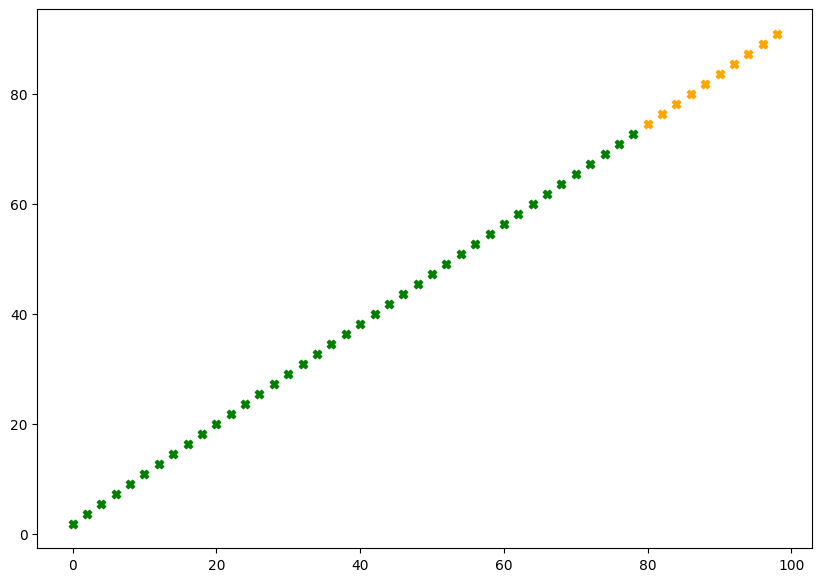

0

In [231]:
plot_data(X_train,X_test,y_train,y_test)

In [232]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,out_features=1)
  def forwardpass(self,x):
    return self.linear_layer(x)


In [233]:
torch.manual_seed(42)
model=LinearRegression()
model.to(device)

LinearRegression(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [234]:
model.forwardpass(X_train)

tensor([[ 0.8300],
        [ 2.3591],
        [ 3.8882],
        [ 5.4172],
        [ 6.9463],
        [ 8.4754],
        [10.0045],
        [11.5335],
        [13.0626],
        [14.5917],
        [16.1208],
        [17.6499],
        [19.1789],
        [20.7080],
        [22.2371],
        [23.7662],
        [25.2952],
        [26.8243],
        [28.3534],
        [29.8825],
        [31.4115],
        [32.9406],
        [34.4697],
        [35.9988],
        [37.5279],
        [39.0569],
        [40.5860],
        [42.1151],
        [43.6442],
        [45.1732],
        [46.7023],
        [48.2314],
        [49.7605],
        [51.2896],
        [52.8186],
        [54.3477],
        [55.8768],
        [57.4059],
        [58.9349],
        [60.4640]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [235]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [236]:
next(model.parameters()).device

device(type='cuda', index=0)

In [237]:
next(model.parameters())

Parameter containing:
tensor([[0.7645]], device='cuda:0', requires_grad=True)

## **Training Loop**

In [279]:
loss=nn.L1Loss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.000001)
epochs=3000
test_loss_values=[]
train_loss_values=[]
epoch_values=[]

In [280]:
torch.manual_seed(42)
for epoch in range(epochs):
  model.train()
  y_pred=model.forwardpass(X_train)
  train_loss=loss(y_pred,y_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()
  if epoch%10==0:
    model.eval()
    with torch.inference_mode():
      y_pred=model.forwardpass(X_test)
      test_loss=loss(y_pred,y_test)
      epoch_values.append(epoch)
      test_loss_values.append(test_loss.cpu().detach().numpy())
      train_loss_values.append(train_loss.cpu().detach().numpy())
      print(f"epoch:{epoch},Train_loss:{train_loss},Test_loss:{train_loss}")


epoch:0,Train_loss:0.4067865312099457,Test_loss:0.4067865312099457
epoch:10,Train_loss:0.40678539872169495,Test_loss:0.40678539872169495
epoch:20,Train_loss:0.40678292512893677,Test_loss:0.40678292512893677
epoch:30,Train_loss:0.40678176283836365,Test_loss:0.40678176283836365
epoch:40,Train_loss:0.40677911043167114,Test_loss:0.40677911043167114
epoch:50,Train_loss:0.4067777693271637,Test_loss:0.4067777693271637
epoch:60,Train_loss:0.4067767262458801,Test_loss:0.4067767262458801
epoch:70,Train_loss:0.4067748188972473,Test_loss:0.4067748188972473
epoch:80,Train_loss:0.4067729115486145,Test_loss:0.4067729115486145
epoch:90,Train_loss:0.4067712724208832,Test_loss:0.4067712724208832
epoch:100,Train_loss:0.4067683815956116,Test_loss:0.4067683815956116
epoch:110,Train_loss:0.40676599740982056,Test_loss:0.40676599740982056
epoch:120,Train_loss:0.40676483511924744,Test_loss:0.40676483511924744
epoch:130,Train_loss:0.40676364302635193,Test_loss:0.40676364302635193
epoch:140,Train_loss:0.40676149

In [281]:
test_loss_values[0]

array(0.5687119, dtype=float32)

Text(0, 0.5, 'Loss')

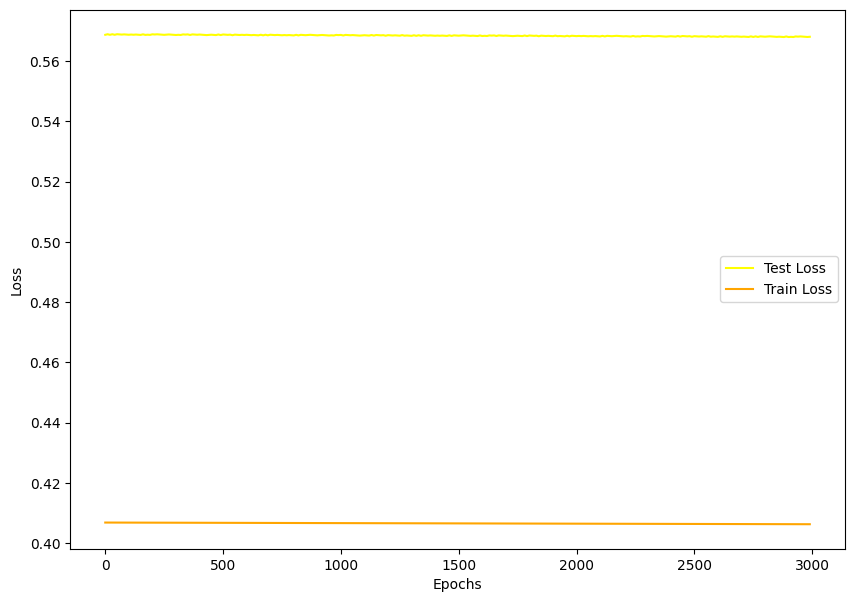

In [282]:
plt.figure(figsize=(10,7))
plt.plot(epoch_values,test_loss_values,c="yellow")
plt.plot(epoch_values,train_loss_values,c="orange")
plt.legend(["Test Loss","Train Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [283]:
y_pred=model.forwardpass(X_test)

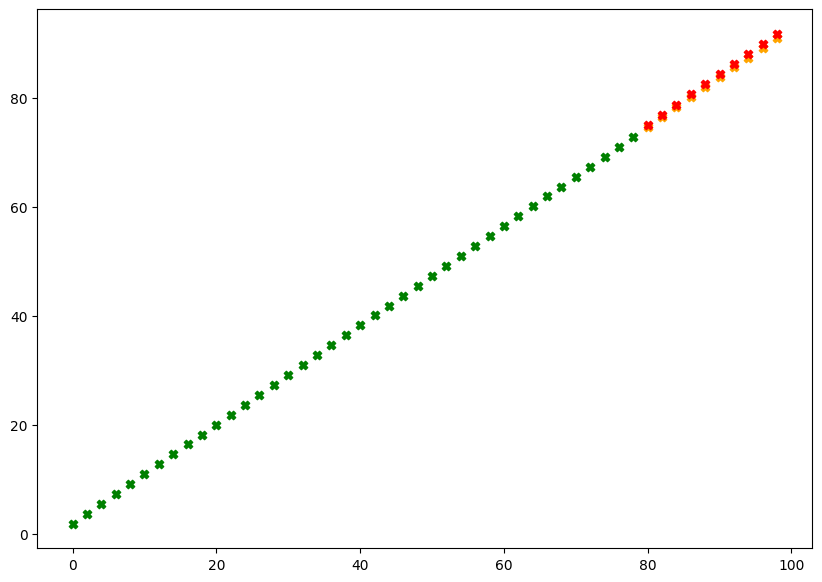

In [284]:
plt.figure(figsize=(10,7))
plt.scatter(X_train.cpu(),y_train.cpu(),c="green",marker="X")
plt.scatter(X_test.cpu(),y_test.cpu(),c="orange",marker="X")
plt.scatter(X_test.cpu(),y_pred.cpu().detach().numpy(),c="red",marker="X")
plt.show()

In [285]:
X_test.dtype

torch.float32

##**Save Model**

In [294]:
MODEL_DIR=Path("models")

In [297]:
MODEL_DIR.mkdir(exist_ok=True)

In [298]:
MODEL_NAME=Path("model0.pth")

In [299]:
torch.save(obj=model.state_dict(),f=MODEL_DIR/MODEL_NAME)

In [301]:
loaded_model=LinearRegression()

In [302]:
loaded_model.load_state_dict(torch.load(f=MODEL_DIR/MODEL_NAME))

<All keys matched successfully>

In [305]:
loaded_model.to(device
                )

LinearRegression(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [306]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9272]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8361], device='cuda:0'))])

In [307]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9272]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8361], device='cuda:0'))])

## **Inferrence The Loaded Model**

In [315]:
loaded_model.eval()
loaded_model.forwardpass(X_test)==model.forwardpass(X_test)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')